# **Earthquakes Explained: Unraveling a Century of Seismic Data with Python**

---

## Introduction

This Jupyter Notebook is designed to be a comprehensive guide to understanding the complex phenomena of seismic events, utilizing Python to analyze and interpret a century's worth of seismic data.



### Why Earthquakes?

Earthquakes are one of the most powerful natural phenomena on our planet. They have shaped landscapes and influenced civilizations. Understanding earthquakes it's crucial for predicting future events, mitigating risks, and safeguarding communities.

### To understand more about Earthquakes...

I recommend taking a look at this webpage: https://spaceplace.nasa.gov/earthquakes/en/

### Getting Started

So, let's start. Whether you are a student, a researcher, or just someone curious about earthquakes, this notebook is designed to provide you with a comprehensive understanding of these natural phenomena, all through the lens of Python and data analysis.

### Importing our data

---

Our analysis will be based on the seismic data collected over the past century.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hibrantapia/Earthquakes_Explained/main/Earthquakes_1900-2023.csv')

In [ ]:
df.head()

Unnamed: 0                      time  latitude  longitude  depth   mag  \
0           0  1900-10-09T12:25:00.000Z     57.09    -153.48    NaN  7.86   
1           1  1901-03-03T07:45:00.000Z     36.00    -120.50    NaN  6.40   
2           2  1901-07-26T22:20:00.000Z     40.80    -115.70    NaN  5.00   
3           3  1901-12-30T22:34:00.000Z     52.00    -160.00    NaN  7.00   
4           4  1902-01-01T05:20:30.000Z     52.38    -167.45    NaN  7.00   

  magType  nst  gap  dmin  ...                   updated  \
0      mw  NaN  NaN   NaN  ...  2022-05-09T14:44:17.838Z   
1      ms  NaN  NaN   NaN  ...  2018-06-04T20:43:44.000Z   
2      fa  NaN  NaN   NaN  ...  2018-06-04T20:43:44.000Z   
3      ms  NaN  NaN   NaN  ...  2018-06-04T20:43:44.000Z   
4      ms  NaN  NaN   NaN  ...  2018-06-04T20:43:44.000Z   

                                place        type horizontalError depthError  \
0      16 km SW of Old Harbor, Alaska  earthquake             NaN        NaN   
1  12 km NNW of Parkfield, California  earthquake             NaN        NaN   
2             6 km SE of Elko, Nevada  earthquake             NaN        NaN   
3                     south of Alaska  earthquake             NaN        NaN   
4      113 km ESE of Nikolski, Alaska  earthquake             NaN        NaN   

  magError  magNst    status  locationSource  magSource  
0      NaN     NaN  reviewed           ushis         pt  
1      NaN     NaN  reviewed           ushis        ell  
2      NaN     NaN  reviewed           ushis        sjg  
3      NaN     NaN  reviewed           ushis        abe  
4      NaN     NaN  reviewed           ushis        abe  

[5 rows x 23 columns]

### **The database is called "Earthquakes_1900-2023.csv".**
---

\




**Disclaimer: Keep in mind, we are only reviewing earthquakes that are 5 or more on the Richter scale, if we count lower, we are looking at probably millions of earthquakes in the last 100 years.**

\

Here's an explanation of each column in the [USGS](https://earthexplorer.usgs.gov/) earthquake data:

```
Time: The time of the earthquake, reported as the number of milliseconds since the Unix epoch (January 1, 1970, 00:00:00 UTC).
Latitude:The latitude of the earthquake's epicenter, reported in decimal degrees.
Longitude: The longitude of the earthquake's epicenter, reported in decimal degrees.
Depth: The depth of the earthquake, reported in kilometers.
Mag: The magnitude of the earthquake, reported on various magnitude scales (see magType column below).
MagType: The magnitude type used to report the earthquake magnitude (e.g. "mb", "ml", "mw").
Nst: The total number of seismic stations used to calculate the earthquake location and magnitude.
Gap: The largest azimuthal gap between azimuthally adjacent stations (in degrees).
Dmin: The distance to the nearest station in degrees.
Rms: The root-mean-square of the residuals of the earthquake's hypocenter location.
Net: The ID of the seismic network used to locate the earthquake.
Id: A unique identifier for the earthquake event.
Updated: The time when the earthquake event was most recently updated in the catalog, reported as the number of milliseconds since the Unix epoch.
Place: A human-readable description of the earthquake's location.
Type: The type of seismic event (e.g. "earthquake", "quarry blast", "explosion").
HorizontalError: The horizontal error, in kilometers, of the location reported in the latitude and longitude columns.
DepthError: The depth error, in kilometers, of the depth column.
MagError: The estimated standard error of the reported earthquake magnitude.
MagNst: The number of seismic stations used to calculate the earthquake magnitude.
Status: The status of the earthquake event in the USGS earthquake catalog (e.g. "reviewed", "automatic").
LocationSource: The ID of the agency or network that provided the earthquake location.
MagSource: The ID of the agency or network that provided the earthquake magnitude.
```

## Data Analysis

---



### **1. How many rows and columns are there in the database?**

In [ ]:
print(df.shape)

(96115, 23)


### **2. A few statistics about the dataset...**

In [ ]:
df.describe()

Unnamed: 0      latitude     longitude         depth           mag  \
count  96115.000000  96115.000000  96115.000000  95830.000000  96115.000000   
mean   48057.000000      3.563711     40.691301     62.450977      5.456296   
std    27746.154899     30.083694    121.858153    108.664042      0.486570   
min        0.000000    -77.080000   -179.997000     -4.000000      5.000000   
25%    24028.500000    -17.732750    -72.197000     14.400000      5.100000   
50%    48057.000000     -1.035500     99.480000     33.000000      5.300000   
75%    72085.500000     29.645000    142.769500     51.000000      5.700000   
max    96114.000000     87.386000    180.000000    700.000000      9.500000   

                nst           gap          dmin           rms  \
count  25552.000000  35847.000000  15909.000000  67374.000000   
mean     166.031739     62.424166      4.285599      0.976135   
std      133.639446     38.834914      5.281175      0.381032   
min        0.000000      6.500000      0.001376     -1.000000   
25%       67.000000     35.100000      1.222000      0.840000   
50%      125.000000     54.000000      2.583000      0.990000   
75%      228.000000     79.000000      5.167000      1.100000   
max      929.000000    360.000000     50.901000     69.320000   

       horizontalError    depthError      magError        magNst  
count     14534.000000  46406.000000  29184.000000  36174.000000  
mean          7.606509      8.450930      0.189006     51.460082  
std           4.893094     11.237023      0.160968     75.903997  
min           0.042000     -1.000000      0.000000      0.000000  
25%           5.900000      2.900000      0.063000     11.000000  
50%           7.300000      5.100000      0.200000     26.000000  
75%           9.000000     10.600000      0.250000     58.000000  
max          99.000000   1091.900000      1.840000    941.000000

### **3. Earthquakes per Year**

In [ ]:
import matplotlib.pyplot as plt

df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year

earthquake_counts = df.groupby('year').size()

mean_earthquakes = earthquake_counts.mean()

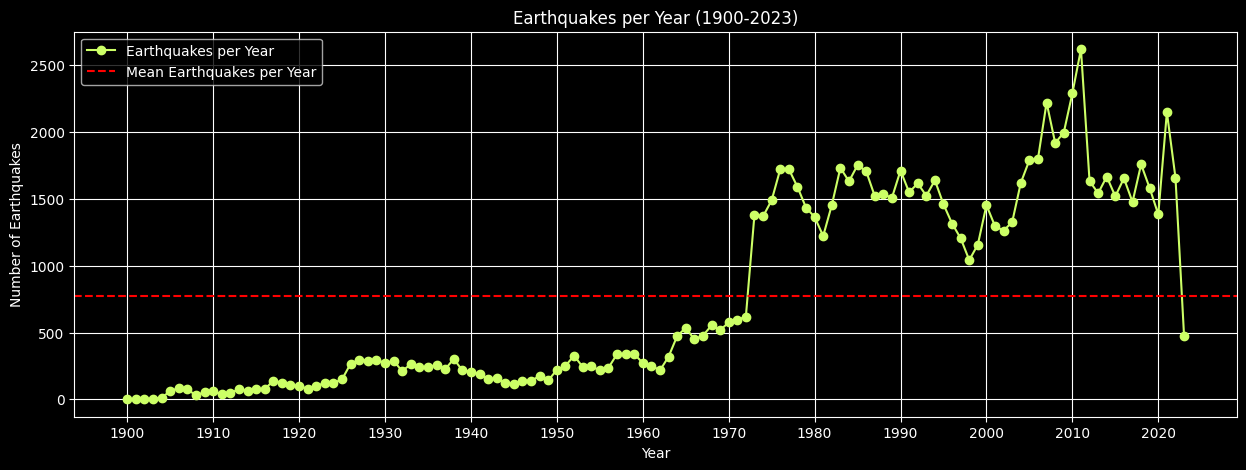

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize = (15, 5))

earthquake_counts.plot(kind = 'line', color = '#ccff66', marker = 'o', label = 'Earthquakes per Year')
plt.axhline(y = mean_earthquakes, color = 'red', linestyle = '--', label = 'Mean Earthquakes per Year')
plt.xticks(range(min(earthquake_counts.index), max(earthquake_counts.index) + 1, 10))
plt.title('Earthquakes per Year (1900-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.legend()
plt.grid(True)
plt.show()

We notice a drop on the last year, that's because the dataset does not have the full list of Earthquakes that happened on 2023.

In [ ]:
last_earthquake = df.sort_values(by = 'time', ascending = False).iloc[0]
last_earthquake_info = last_earthquake[['time']]

print("The last recorded Earthquake the dataset happened on:", last_earthquake_info)

The last recorded Earthquake the dataset happened on: time    2023-04-02 19:32:24.808000+00:00
Name: 96096, dtype: object


### **4. Which year had the greatest number of earthquakes and how many were there?**

In [ ]:
max_year = earthquake_counts.idxmax()
max_count = earthquake_counts.max()

print(f"Year with the highest number of earthquakes: {max_year} with {max_count} earthquakes.")

Year with the highest number of earthquakes: 2011 with 2621 earthquakes.


### **5. Histogram of the Magnitude Distribution**

<Axes: title={'center': 'Histogram of the Magnitude Distribution'}, ylabel='Frequency'>

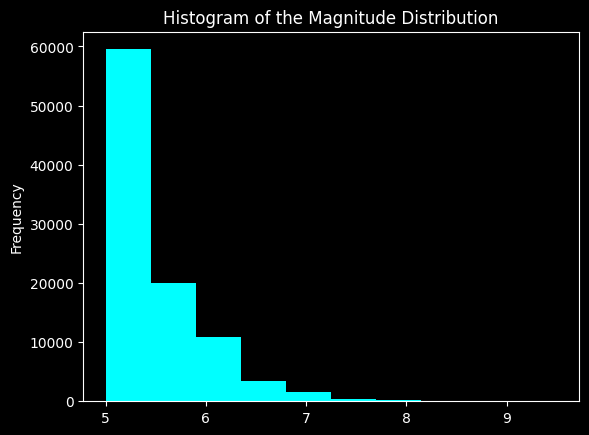

In [ ]:
df['mag'].plot(kind = 'hist', title = 'Histogram of the Magnitude Distribution', color = '#00ffff')

### **6. What has been the strongest earthquake in the last 100 years?**


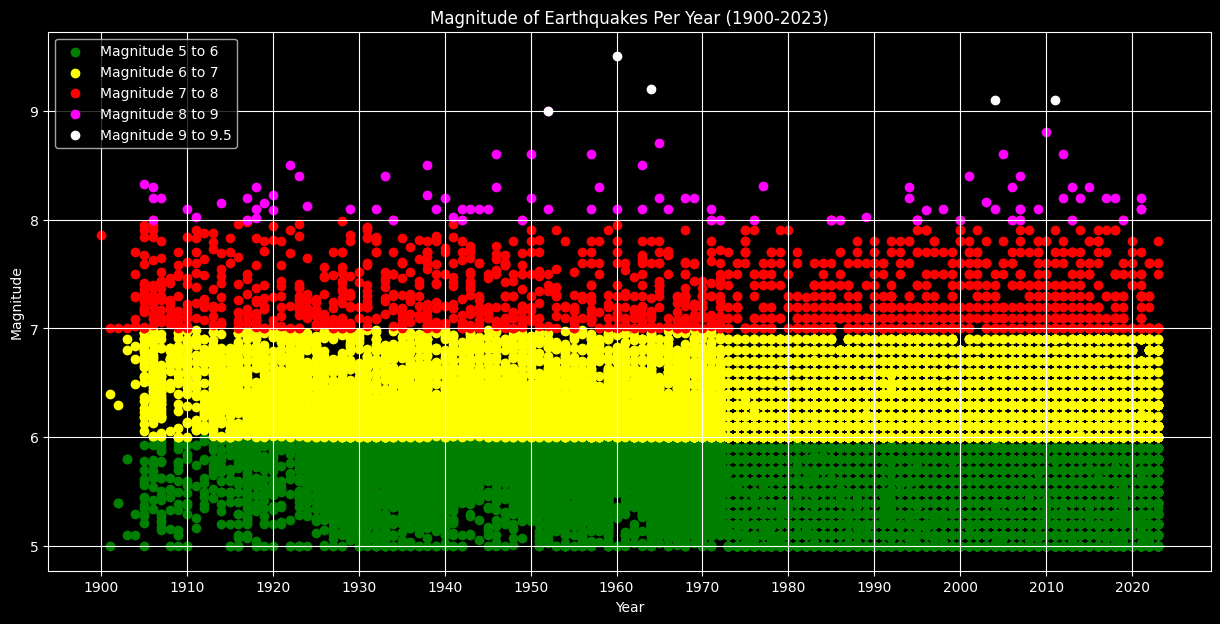

In [ ]:
plt.figure(figsize = (15, 7))

mag_5_to_6 = df[(df['mag'] >= 5) & (df['mag'] < 6)]
plt.scatter(mag_5_to_6['year'], mag_5_to_6['mag'], color = 'green', label = 'Magnitude 5 to 6')

mag_6_to_7 = df[(df['mag'] >= 6) & (df['mag'] < 7)]
plt.scatter(mag_6_to_7['year'], mag_6_to_7['mag'], color = 'yellow', label = 'Magnitude 6 to 7')

mag_7_to_8 = df[(df['mag'] >= 7) & (df['mag'] <= 8)]
plt.scatter(mag_7_to_8['year'], mag_7_to_8['mag'], color = 'red', label = 'Magnitude 7 to 8')

mag_8_to_9 = df[(df['mag'] >= 8) & (df['mag'] <= 9)]
plt.scatter(mag_8_to_9['year'], mag_8_to_9['mag'], color = '#ff00ff', label = 'Magnitude 8 to 9')

mag_9_to_95 = df[(df['mag'] >= 9) & (df['mag'] <= 9.5)]
plt.scatter(mag_9_to_95['year'], mag_9_to_95['mag'], color = 'white', label = 'Magnitude 9 to 9.5')

plt.xticks(range(min(df['year']), max(df['year']) + 1, 10))
plt.title('Magnitude of Earthquakes Per Year (1900-2023)')
plt.xlabel('Year')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
magnitude_categories = {
    '5': (5, 5.99),
    '6': (6, 6.99),
    '7': (7, 7.99),
    '8': (8, 8.99),
    '9+': (9, 9.5),
}

earthquake_counts = {}
for category, (min_mag, max_mag) in magnitude_categories.items():
    count = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)].shape[0]
    earthquake_counts[category] = count

formatted_output = "\n".join([f"Magnitude {category}: {count:,} earthquakes" for category, count in earthquake_counts.items()])
print(formatted_output)

Magnitude 5: 82,682 earthquakes
Magnitude 6: 11,997 earthquakes
Magnitude 7: 1,341 earthquakes
Magnitude 8: 90 earthquakes
Magnitude 9+: 5 earthquakes


In [ ]:
stronger_earthquake = df.loc[df['mag'].idxmax()]
print("Strongest Earthquake Information:")
print(stronger_earthquake)

Strongest Earthquake Information:
Unnamed: 0                                                      9869
time                                       1960-05-22 19:11:20+00:00
latitude                                                     -38.143
longitude                                                    -73.407
depth                                                           25.0
mag                                                              9.5
magType                                                           mw
nst                                                              NaN
gap                                                              NaN
dmin                                                             NaN
rms                                                              NaN
net                                                         official
id                                         official19600522191120_30
updated                                     2022-04-26T16:30:06.879Z


### **7. Correlation between depth and magnitude**

<Axes: title={'center': 'Depth vs Magnitude'}, xlabel='depth', ylabel='mag'>

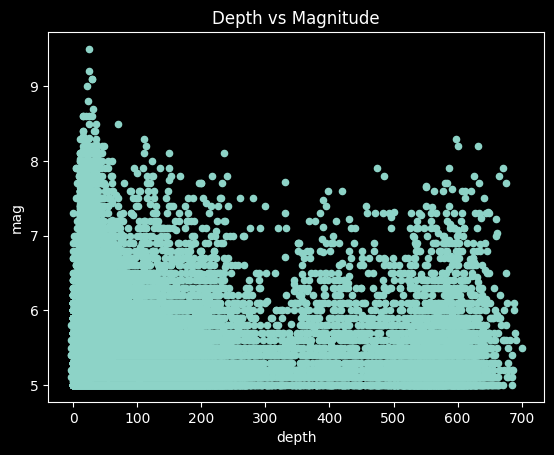

In [ ]:
df.plot(kind = 'scatter', x = 'depth', y = 'mag', title = 'Depth vs Magnitude')

### **8. Percentage of Earthquakes by Magnitude Range**

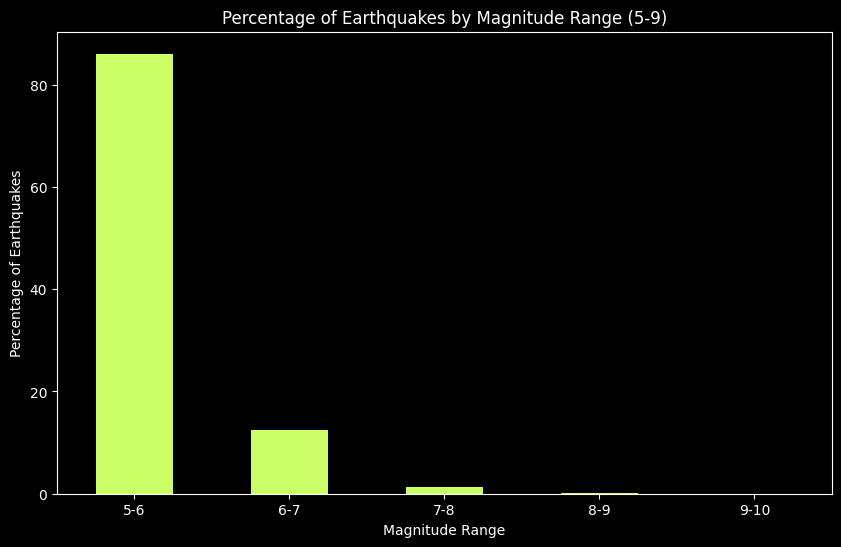

In [ ]:
bins = [5, 6, 7, 8, 9, 10]
labels = ['5-6', '6-7', '7-8', '8-9', '9-10']

df['mag_range'] = pd.cut(df['mag'], bins = bins, labels = labels, right = False)
magnitude_counts = df['mag_range'].value_counts(sort = False)
magnitude_percentages = magnitude_counts / magnitude_counts.sum() * 100

plt.figure(figsize = (10, 6))
magnitude_percentages.plot(kind = 'bar', color = '#ccff66')
plt.title('Percentage of Earthquakes by Magnitude Range (5-9)')
plt.xlabel('Magnitude Range')
plt.ylabel('Percentage of Earthquakes')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
magnitude_percentages

5-6     86.024034
6-7     12.481923
7-8      1.395204
8-9      0.093638
9-10     0.005202
Name: mag_range, dtype: float64

### **9. Which are the top 10 countries with the highest number of earthquakes?**

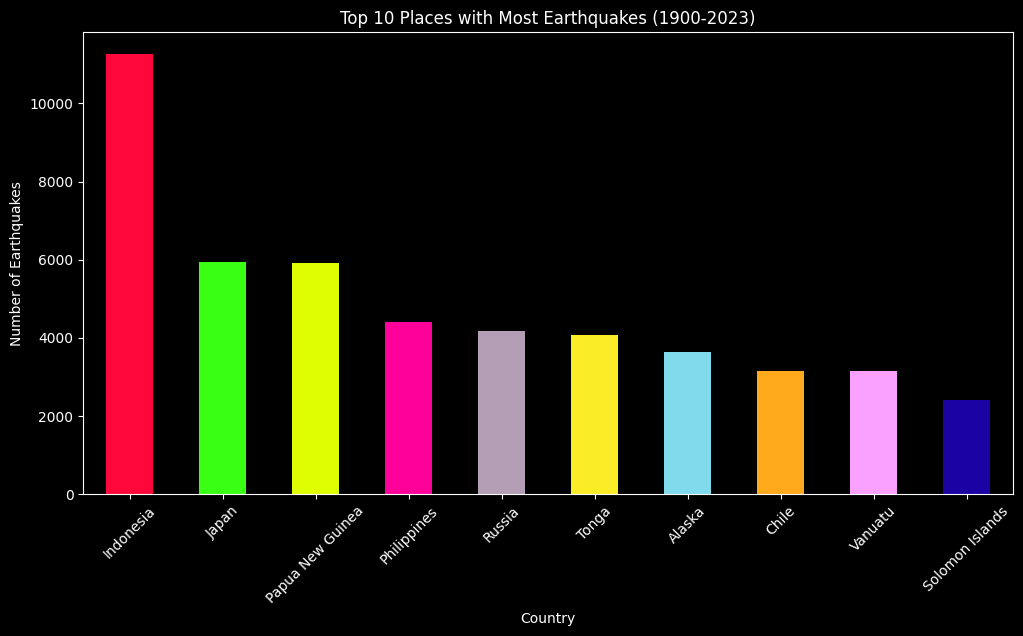

In [ ]:
import re

df['country'] = df['place'].apply(lambda x: re.split(', | of ', str(x))[-1])
top_countries = df['country'].value_counts().head(10)

neon_colors = [
    '#FF073A',
    '#39FF14',
    '#DFFF00',
    '#FE019A',
    '#B39EB5',
    '#FAED27',
    '#80DAEB',
    '#FFAA1D',
    '#FAA0FE',
    '#1B03A3'
]

plt.figure(figsize = (12, 6))
top_countries.plot(kind = 'bar', color = neon_colors)
plt.title('Top 10 Places with Most Earthquakes (1900-2023)')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
top_countries

Indonesia           11256
Japan                5952
Papua New Guinea     5917
Philippines          4414
Russia               4183
Tonga                4065
Alaska               3639
Chile                3148
Vanuatu              3147
Solomon Islands      2403
Name: country, dtype: int64

### **10. Top 20 Most Powerful Earthquakes**

In [ ]:
top_20_earthquakes = df.sort_values(by = 'mag', ascending = False).head(20)
top_20_list = top_20_earthquakes[['year', 'place', 'mag']].reset_index(drop = True)


top_20_list

year                                              place   mag
0   1960  1960 Great Chilean Earthquake (Valdivia Earthq...  9.50
1   1964       1964 Prince William Sound Earthquake, Alaska  9.20
2   2004          2004 Sumatra - Andaman Islands Earthquake  9.10
3   2011                2011 Great Tohoku Earthquake, Japan  9.10
4   1952      89 km ESE of Petropavlovsk-Kamchatsky, Russia  9.00
5   2010                       36 km WNW of Quirihue, Chile  8.80
6   1965              Rat Islands, Aleutian Islands, Alaska  8.70
7   1950                        1950 Assam-Tibet Earthquake  8.60
8   2012             off the west coast of northern Sumatra  8.60
9   1957                          81 km ESE of Adak, Alaska  8.60
10  2005                    78 km WSW of Singkil, Indonesia  8.60
11  1946  1946 Aleutian Islands (Unimak Island) Earthqua...  8.60
12  1938                      141 km WNW of Tual, Indonesia  8.50
13  1922                       94 km ENE of Vallenar, Chile  8.50
14  1963                     132 km ESE of Kuril’sk, Russia  8.50
15  1923                     121 km ESE of Mil’kovo, Russia  8.40
16  1933       1933 Sanriku (Sanriku-oki) Earthquake, Japan  8.40
17  2001                            6 km SSW of Atico, Peru  8.40
18  2007                   122 km SW of Bengkulu, Indonesia  8.40
19  1905               121 km WNW of Tosontsengel, Mongolia  8.33

# Cool Visualizations

---

## **1. 100 Years of Earthquakes**

### With Basemap

In [ ]:
!pip install Basemap

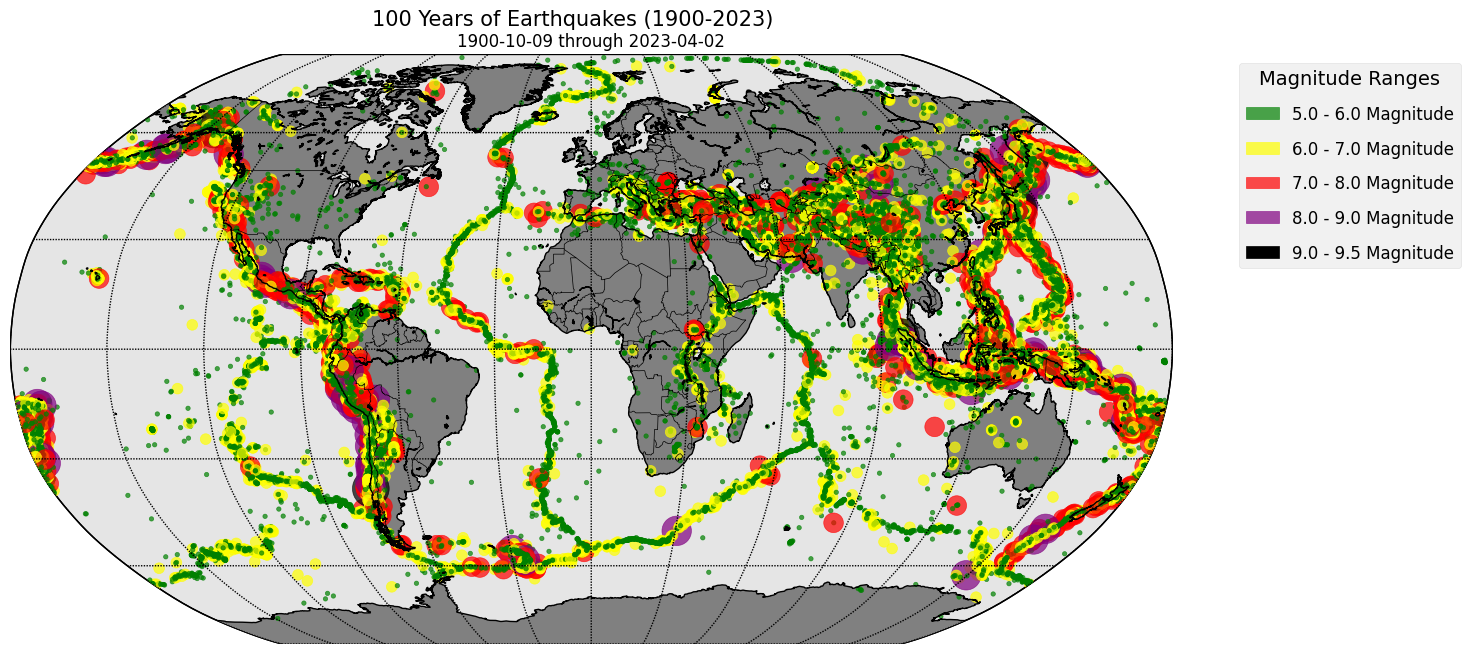

In [ ]:
import numpy as np
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap

def get_marker_color_and_size(magnitude):
    if 5.0 <= magnitude < 6.0:
        return 'green', 10
    elif 6.0 <= magnitude < 7.0:
        return 'yellow', 60
    elif 7.0 <= magnitude < 8.0:
        return 'red', 200
    elif 8.0 <= magnitude < 9.0:
        return 'purple', 450
    elif 9.0 <= magnitude <= 9.5:
        return 'black', 700
    else:
        return 'gray', 0

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

fig = plt.figure(figsize = (15, 8))

eq_map = Basemap(projection = 'robin', resolution = 'l', area_thresh = 1000.0, lat_0 = 0, lon_0 = 0)

eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.bluemarble()
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

x, y = eq_map(df["longitude"].values, df["latitude"].values)

marker_colors_and_sizes = [get_marker_color_and_size(mag) for mag in df["mag"].values]
marker_colors, marker_sizes = zip(*marker_colors_and_sizes)

scatter = eq_map.scatter(x, y, s = marker_sizes, c = marker_colors, alpha = 0.7)

legend_handles = [
    mpatches.Patch(color = 'green', label = '5.0 - 6.0 Magnitude', alpha = 0.7),
    mpatches.Patch(color = 'yellow', label = '6.0 - 7.0 Magnitude', alpha = 0.7),
    mpatches.Patch(color = 'red', label = '7.0 - 8.0 Magnitude', alpha = 0.7),
    mpatches.Patch(color = 'purple', label = '8.0 - 9.0 Magnitude', alpha = 0.7),
    mpatches.Patch(color = 'black', label = '9.0 - 9.5 Magnitude', alpha = 1.0),
]

legend = plt.legend(handles = legend_handles, loc = 'upper left', fontsize = 12, scatterpoints = 1, labelspacing = 1,
           title = 'Magnitude Ranges', title_fontsize = '14', bbox_to_anchor = (1.05, 1), framealpha = 0.5)
for text in legend.get_texts():
    text.set_color('black')

legend.get_title().set_color('black')

plt.title("1900-10-09 through 2023-04-02", fontsize = 12, color = 'black')
subtitle = "100 Years of Earthquakes (1900-2023)"
plt.text(0.5, 0.9, subtitle, fontsize = 15, color = 'black', ha = 'center', transform = fig.transFigure)

plt.show()

## **2. The Most Powerful Earthquakes: 1900-2023 (Magnitude 7.0+ Richter Scale)**

### Using Folium

In [ ]:
import folium
import branca

earthquakes_above_7 = df[df['mag'] > 7]

mean_lat = earthquakes_above_7['latitude'].mean()
mean_lon = earthquakes_above_7['longitude'].mean()

cust_tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}'
cust_attr = 'Tiles &copy; Esri &mdash; National Geographic, Esri, DeLorme, NAVTEQ, UNEP-WCMC, USGS, NASA, ESA, METI, NRCAN, GEBCO, NOAA, iPC'

earthquake_map = folium.Map(
    location = [mean_lat, mean_lon],
    tiles = cust_tiles,
    attr = cust_attr,
    zoom_start = 2
)

def get_color(magnitude):
    if 7 <= magnitude < 8:
        return 'red'
    elif 8 <= magnitude < 9:
        return 'purple'
    elif 9 <= magnitude <= 9.5:
        return 'black'
    else:
        return 'grey'

for _, earthquake in earthquakes_above_7.iterrows():
    location = [earthquake['latitude'], earthquake['longitude']]
    date_str = pd.to_datetime(earthquake['time']).strftime('%Y-%m-%d')
    time_str = pd.to_datetime(earthquake['time']).strftime('%H:%M:%S')
    tooltip = f"Date: {date_str}, Magnitude: {earthquake['mag']}, Location: {earthquake['place']}, Time: {time_str}"
    circle_color = get_color(earthquake['mag'])

    folium.CircleMarker(
        location,
        radius = earthquake['mag'] ** 5 / 2500,
        color = circle_color,
        opacity = 0.55,
        popup = f"""
LAT: {earthquake['latitude']},
LON: {earthquake['longitude']},
TIME: {earthquake['time']},
DEPTH: {earthquake['depth']},
MAG: {earthquake['mag']},
MAGTYPE: {earthquake['magType']},
NST: {earthquake['nst']},
GAP: {earthquake['gap']},
DMIN: {earthquake['dmin']},
RMS: {earthquake['rms']},
NET: {earthquake['net']},
ID: {earthquake['id']},
UPDATED: {earthquake['updated']},
PLACE: {earthquake['place']},
TYPE: {earthquake['type']},
HORIZONTAL ERROR: {earthquake['horizontalError']},
DEPTH ERROR: {earthquake['depthError']},
MAG ERROR: {earthquake['magError']},
MAG NST: {earthquake['magNst']},
STATUS: {earthquake['status']},
LOCATION SOURCE: {earthquake['locationSource']},
MAG SOURCE: {earthquake['magSource']},
YEAR: {earthquake['year']},
MAG RANGE: {earthquake['mag_range']},
COUNTRY: {earthquake['country']},
"""
,
        tooltip = tooltip
    ).add_to(earthquake_map)

url = 'https://raw.githubusercontent.com/fraxen/tectonicplates/master/GeoJSON/PB2002_boundaries.json'

folium.GeoJson(
    url,
    name = 'geojson'
).add_to(earthquake_map)

folium.LayerControl().add_to(earthquake_map)

year_select = earthquakes_above_7['year'].mode()[0]
title_html = '''
             <h3 align="center" style="font-size:16px"><b>The Most Powerful Earthquakes: 1900-2023 (Magnitude 7.0+ Richter Scale)</b></h3>
             '''.format(year_select)
earthquake_map.get_root().html.add_child(folium.Element(title_html))

legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 150px; height: 90px;
     border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; Magnitude RS<br>
     &nbsp; <i style="background:red; width:10px; height:10px; display:inline-block; opacity:0.7;"></i> 7.0 - 8.0 &nbsp; <br>
     &nbsp; <i style="background:purple; width:10px; height:10px; display:inline-block; opacity:0.7;"></i> 8.0 - 9.0 &nbsp; <br>
     &nbsp; <i style="background:black; width:10px; height:10px; display:inline-block; opacity:0.7;"></i> 9.0 - 9.5 &nbsp;
</div>
'''

earthquake_map.get_root().html.add_child(folium.Element(legend_html))

earthquake_map

## **3. Making an animation**

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation


df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year

def get_marker_color_and_size(magnitude):
    if 5.0 <= magnitude < 6.0:
        return 'green', 10
    elif 6.0 <= magnitude < 7.0:
        return 'yellow', 60
    elif 7.0 <= magnitude < 8.0:
        return 'red', 200
    elif 8.0 <= magnitude < 9.0:
        return 'purple', 450
    elif 9.0 <= magnitude <= 9.5:
        return 'black', 700
    else:
        return 'gray', 0

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

def update(year):
    plt.clf()
    fig = plt.figure(figsize = (15, 8))

    eq_map = Basemap(projection = 'robin', resolution = 'l', area_thresh = 1000.0, lat_0 = 0, lon_0 = 0)
    eq_map.drawcoastlines()
    eq_map.drawcountries()
    eq_map.fillcontinents(color = 'gray')
    eq_map.bluemarble()
    eq_map.drawmapboundary()
    eq_map.drawmeridians(np.arange(0, 360, 30))
    eq_map.drawparallels(np.arange(-90, 90, 30))

    year_data = df[df['year'] == year]

    x, y = eq_map(year_data["longitude"].values, year_data["latitude"].values)

    marker_colors_and_sizes = [get_marker_color_and_size(mag) for mag in year_data["mag"].values]
    marker_colors, marker_sizes = zip(*marker_colors_and_sizes)

    eq_map.scatter(x, y, s = marker_sizes, c = marker_colors, alpha = 0.7)

    legend_handles = [
    mpatches.Patch(color = 'green', label = '5.0 - 6.0 Magnitude', alpha = 0.7),
    mpatches.Patch(color = 'yellow', label = '6.0 - 7.0 Magnitude', alpha = 0.7),
    mpatches.Patch(color = 'red', label = '7.0 - 8.0 Magnitude', alpha = 0.7),
    mpatches.Patch(color = 'purple', label = '8.0 - 9.0 Magnitude', alpha = 0.7),
    mpatches.Patch(color = 'black', label = '9.0 - 9.5 Magnitude', alpha = 1.0),
    ]

    legend = plt.legend(handles = legend_handles, loc = 'upper left', fontsize = 12, scatterpoints = 1, labelspacing = 1,
           title = 'Magnitude Ranges', title_fontsize = '14', bbox_to_anchor = (1.05, 1), framealpha = 0.5)
    for text in legend.get_texts():
        text.set_color('black')

    legend.get_title().set_color('black')
    plt.title(f"Earthquakes in {year}", fontsize = 12, color = 'black')

start_year = df['year'].min()
end_year = df['year'].max()

for year in range(start_year, end_year + 1):
    update(year)
    plt.savefig(f'earthquake_{year}.png', bbox_inches = 'tight')
    plt.close()
```



In [ ]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/dUq0pIF_jlA?si=L3pAWZUFKtCBldRW" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

# **Thank you for reading!**
Knowledge shared is knowledge squared. Please, make sure you share this article on social media so it can rise above the rubbish.





Inaction is the best way to kill an article.

# **Connect with Hibran Tapia**

You can find me on [LinkedIn](https://www.linkedin.com/in/hibrantapia/), [Twitter](https://twitter.com/HibranTapia), [Instagram](https://www.instagram.com/hibranhtapia/), and [GitHub](https://github.com/HibranTapia).  



Make sure to contact me if you have any questions.

## References:

---



1. TutorialsPoint. (n.d.). Analyze and Visualize Earthquake Data in Python with Matplotlib. Retrieved from https://www.tutorialspoint.com/analyze-and-visualize-earthquake-data-in-python-with-matplotlib

2. MLearning AI. (n.d.). Earthquakes Data Visualization. Retrieved from https://medium.com/mlearning-ai/earthquakes-data-visualization-5da0d2abeea1

3. CodeSpeedy. (n.d.). Analyze and Visualize Earthquake Data in Python with Matplotlib. Retrieved from https://www.codespeedy.com/analyze-and-visualize-earthquake-data-in-python-with-matplotlib/

4. Intro to Python. (n.d.). Visualization of Earthquakes. Retrieved from http://introtopython.org/visualization_earthquakes.html

5. Blanchard, J. (n.d.). Earthquake Visualization with Folium. Kaggle. Retrieved from https://www.kaggle.com/code/jonblanchard/earthquake-visualization-with-folium

6. GitConnected. (n.d.). Plotting USGS Earthquake Data with Folium. Retrieved from https://levelup.gitconnected.com/plotting-usgs-earthquake-data-with-folium-8f11ddc21950